In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.ticker as mticker

## Fine scaling

In [2]:
# Load the data
ds = xr.open_dataset('/home/egauillard/extreme_events_forecasting/notebooks/test/data_fine.nc')
target = xr.open_dataset('/home/egauillard/extreme_events_forecasting/notebooks/test/target_fine.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:    (time: 359, longitude: 360, latitude: 111)
Coordinates:
  * time       (time) datetime64[ns] 1940-01-07 1940-01-08 ... 1941-12-31
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 -20.0 -19.0 -18.0 -17.0 ... 88.0 89.0 90.0
    dayofyear  (time) int64 ...
Data variables:
    stream     (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    ttr        (time, latitude, longitude) float32 ...

In [14]:
ds["stream"].values

array([[[ 1.        ,  1.0000001 ,  0.9999999 , ...,  0.9999999 ,
          0.9999999 ,  1.        ],
        [ 1.        ,  0.9999999 ,  1.        , ...,  1.        ,
          1.0000001 ,  0.9999999 ],
        [ 1.        ,  1.0000001 ,  0.9999999 , ...,  0.9999998 ,
          1.0000001 ,  1.        ],
        ...,
        [ 1.0000019 ,  0.99999803,  1.        , ...,  0.99999803,
          1.        ,  1.        ],
        [ 0.99999756,  0.99999756,  0.99999756, ...,  1.0000025 ,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  0.9999969 ]],

       [[ 1.        ,  1.        ,  1.        , ...,  1.        ,
          0.9999998 ,  0.9999999 ],
        [ 1.        ,  1.        ,  1.        , ...,  0.9999999 ,
          1.        ,  1.        ],
        [ 1.0000001 ,  1.0000001 ,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        ...,
        [ 0.99999815,  1.0000019 ,  1.0000019 , ...,  

In [4]:
date = '1940-03-07'  # You can change this to any date in your dataset

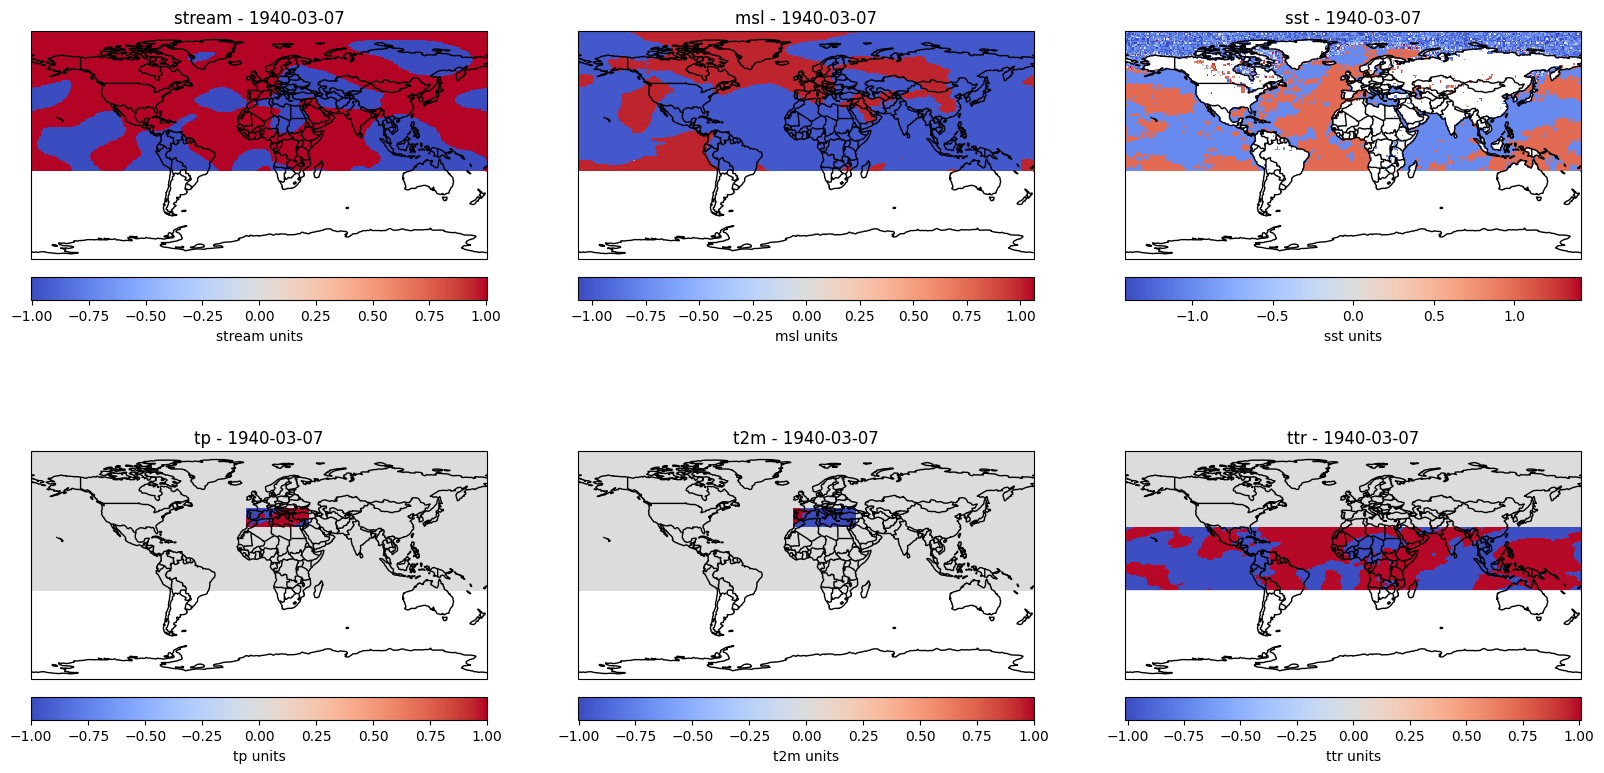

In [5]:


# Get all data variables
variables = list(ds.data_vars)

# Set up the plot
n_vars = len(variables)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig = plt.figure(figsize=(20, 5*n_rows))

for i, var in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1, projection=ccrs.PlateCarree())
    
    # Select data for the specific date
    data = ds[var].sel(time=date)
    
    # Determine the maximum absolute value in the data
    max_abs_val = max(abs(data.min()), abs(data.max()))
    
    # Plot the data with centered colormap
    im = ax.pcolormesh(ds.longitude, ds.latitude, data, 
                       transform=ccrs.PlateCarree(), 
                       cmap='coolwarm',
                       vmin=-max_abs_val, vmax=max_abs_val)
    
    # Add coastlines and borders
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    
    # Set the extent of the map
    ax.set_global()
    
    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label(f'{var} units')  # Add units label if known
    
    # Set the title
    ax.set_title(f'{var} - {date}')

[[-1.0000002 -1.         1.         1.         0.9999998]]
[30, 35.5, 45]
[-10, -5.5, 4.5, 14.5, 24.5, 34.5, 40]


/home/egauillard/extreme_events_forecasting/extreme_events_env/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


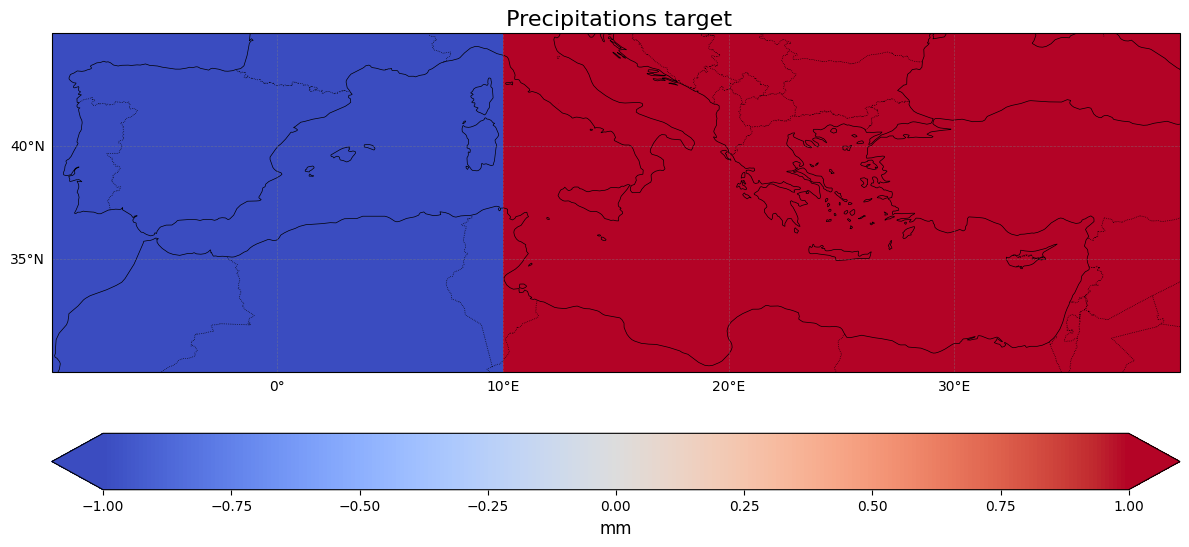

In [6]:


# Préparez les données
data = target['tp'].sel(time = date).values  # Assurez-vous que c'est un array 2D
cmap = 'coolwarm'
title = " Precipitations target"
print(data)

# Calculez les valeurs min et max pour centrer la colormap sur 0
max_abs_val = np.max(np.abs(data))
lats = [30] + list(target.latitude.values) + [45]
lons = [-10] + list(target.longitude.values) + [40]
print(lats)
print(lons)
vmin  = - max_abs_val
vmax = max_abs_val
label = 'mm'

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.imshow(data, cmap=cmap, transform=ccrs.PlateCarree(),
            extent=[lons[0], lons[-1], lats[0], lats[-1]],
            vmin=vmin, vmax=vmax)
ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', color='black', linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey', alpha=0.3)
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='lightblue', alpha=0.3)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(range(-10, 41, 10))
gl.ylocator = mticker.FixedLocator(range(30, 46, 5))
gl.top_labels = False
gl.right_labels = False

cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.08, extend='both')
if label:
    cbar.set_label(label, fontsize=12)

plt.title(title, fontsize=16)
plt.tight_layout()

## Coarse scaling

In [11]:
coarse_ds = xr.open_dataset('/home/egauillard/extreme_events_forecasting/notebooks/test/data_coarse.nc')
coarse_target = xr.open_dataset('/home/egauillard/extreme_events_forecasting/notebooks/test/target_coarse.nc')

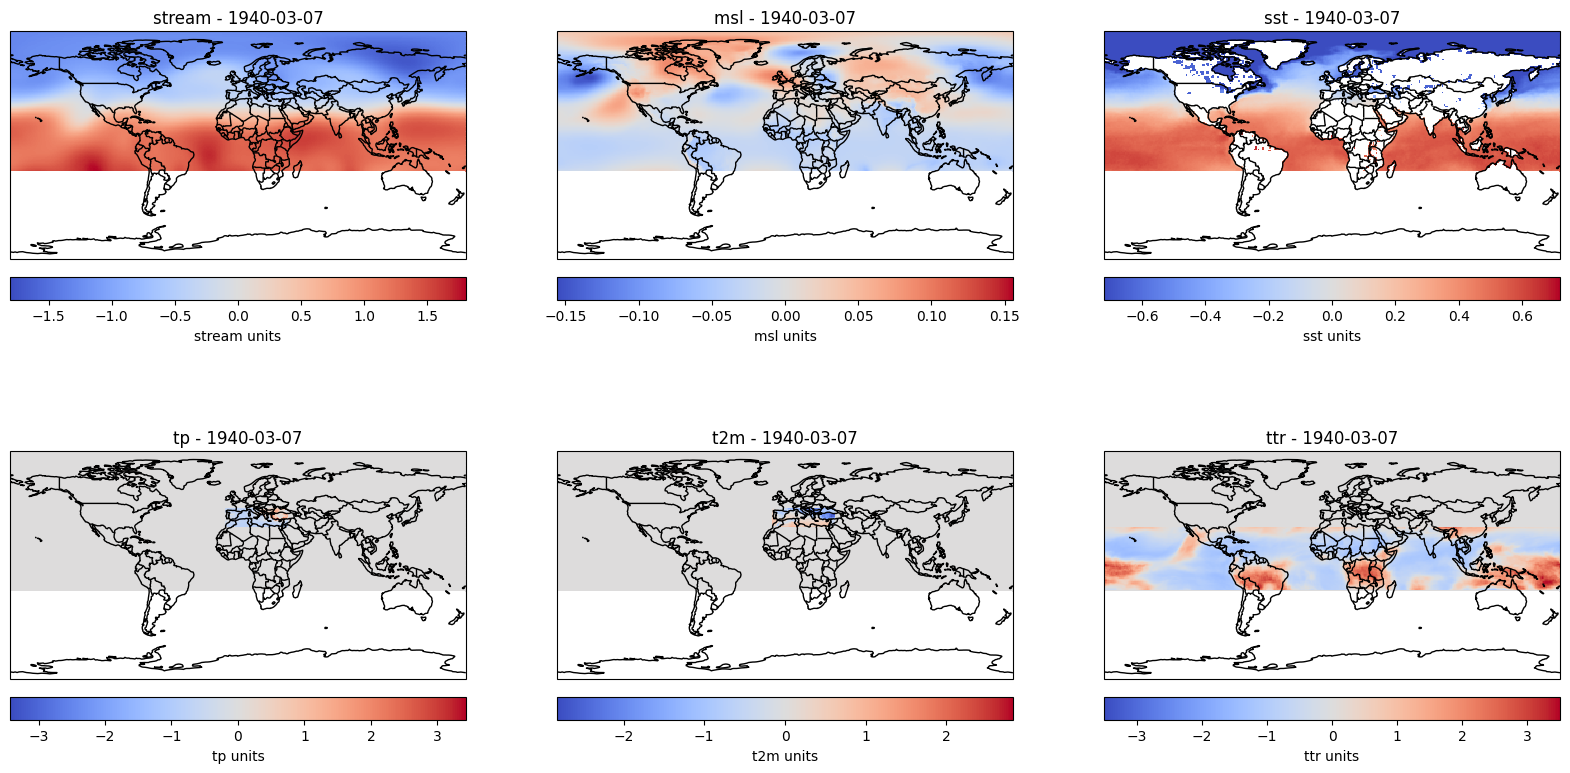

In [12]:


# Get all data variables
variables = list(coarse_ds.data_vars)

# Set up the plot
n_vars = len(variables)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig = plt.figure(figsize=(20, 5*n_rows))

for i, var in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1, projection=ccrs.PlateCarree())
    
    # Select data for the specific date
    data = coarse_ds[var].sel(time=date)
    
    # Determine the maximum absolute value in the data
    max_abs_val = max(abs(data.min()), abs(data.max()))
    
    # Plot the data with centered colormap
    im = ax.pcolormesh(coarse_ds.longitude, coarse_ds.latitude, data, 
                       transform=ccrs.PlateCarree(), 
                       cmap='coolwarm',
                       vmin=-max_abs_val, vmax=max_abs_val)
    
    # Add coastlines and borders
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    
    # Set the extent of the map
    ax.set_global()
    
    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label(f'{var} units')  # Add units label if known
    
    # Set the title
    ax.set_title(f'{var} - {date}')

[[-0.64621602 -1.15415514 -0.90514958 -0.05419342  0.47625248]]
[30, 35.5, 45]
[-10, -5.5, 4.5, 14.5, 24.5, 34.5, 40]


/home/egauillard/extreme_events_forecasting/extreme_events_env/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


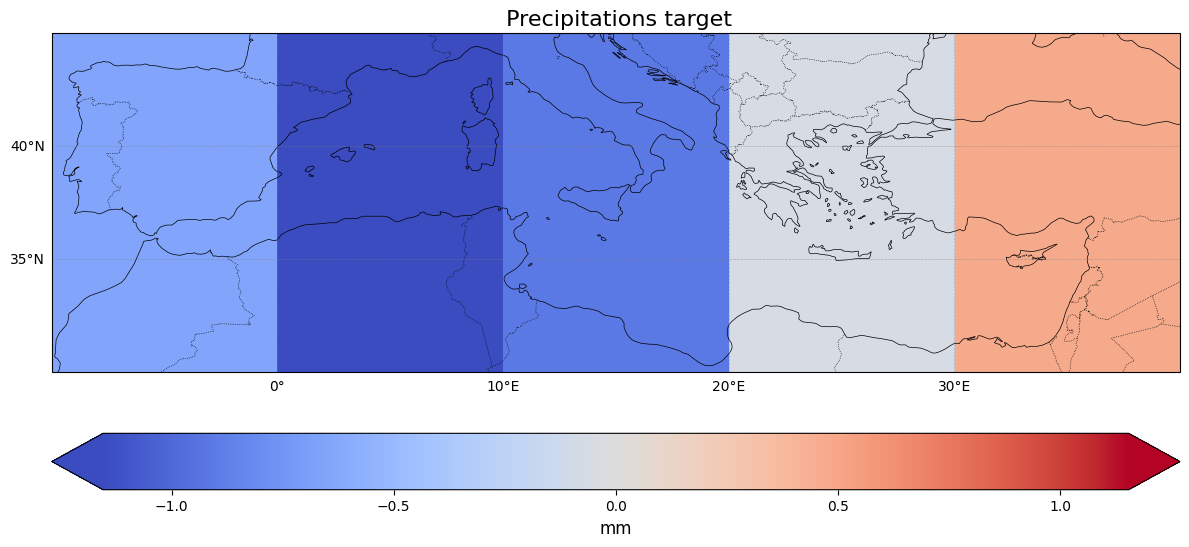

In [9]:


# Préparez les données
data = coarse_target['tp'].sel(time = date).values  # Assurez-vous que c'est un array 2D
cmap = 'coolwarm'
title = " Precipitations target"
print(data)

# Calculez les valeurs min et max pour centrer la colormap sur 0
max_abs_val = np.max(np.abs(data))
lats = [30] + list(coarse_target.latitude.values) + [45]
lons = [-10] + list(coarse_target.longitude.values) + [40]
print(lats)
print(lons)
vmin  = - max_abs_val
vmax = max_abs_val
label = 'mm'

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.imshow(data, cmap=cmap, transform=ccrs.PlateCarree(),
            extent=[lons[0], lons[-1], lats[0], lats[-1]],
            vmin=vmin, vmax=vmax)
ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', color='black', linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey', alpha=0.3)
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='lightblue', alpha=0.3)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(range(-10, 41, 10))
gl.ylocator = mticker.FixedLocator(range(30, 46, 5))
gl.top_labels = False
gl.right_labels = False

cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.08, extend='both')
if label:
    cbar.set_label(label, fontsize=12)

plt.title(title, fontsize=16)
plt.tight_layout()

(array([0., 1., 1., 1., 2., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1.00000000e-01, 1.20679264e-01, 1.45634848e-01, 1.75751062e-01,
        2.12095089e-01, 2.55954792e-01, 3.08884360e-01, 3.72759372e-01,
        4.49843267e-01, 5.42867544e-01, 6.55128557e-01, 7.90604321e-01,
        9.54095476e-01, 1.15139540e+00, 1.38949549e+00, 1.67683294e+00,
        2.02358965e+00, 2.44205309e+00, 2.94705170e+00, 3.55648031e+00,
        4.29193426e+00, 5.17947468e+00, 6.25055193e+00, 7.54312006e+00,
        9.10298178e+00, 1.09854114e+01, 1.32571137e+01, 1.59985872e+01,
        1.93069773e+01, 2.32995181e+01, 2.81176870e+01, 3.39322177e+01,
        4.09491506e+01, 4.94171336e+01, 5.96362332e+01, 7.19685673e+01,
        8.68511374e+01, 1.04811313e+02, 1.26485522e+02, 1.52641797e+02,
        1.84206997e+02, 2.22299648e+02, 2.68269580e+02, 3.

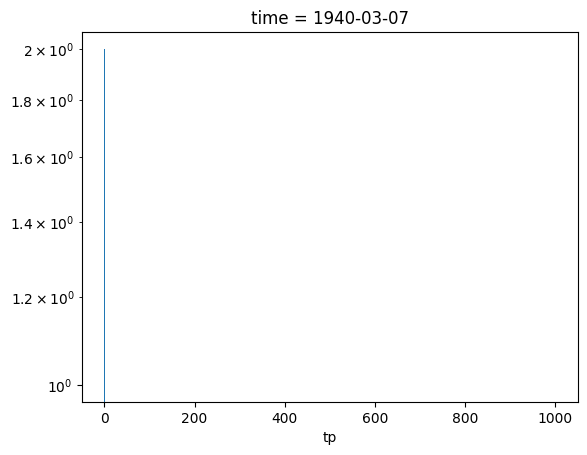

In [10]:
tp = coarse_ds.tp.sel(time=date)
# plot le log histogramme de la pluie
tp.sel(longitude=slice(-10, 10), latitude=slice(30, 40)).plot.hist(bins=np.logspace(-1, 3, 50), log=True)